---
title: "5: Seeing (data) is believing"
sidebar: modules
---

- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg){width=30%}](https://colab.research.google.com/github/nils-holmberg/cda-gai/blob/main/jnb/apws-module-5.ipynb){target="_blank"}

In [ ]:
#| eval: false

# Lets recapitulate modules! Try some of the following:

# 1. play with image creation, mask images, and edge images, features

# 2. load the penguins dataframe, create descriptives, histogram

# 3. visualize body mass as a function of species, bar plot

# 4. save bar plot bar plot with error bars as high quality figure

# 5. visualize flipper length and body mass as scatterplot

# 6. visualize data model, separate by species and draw trend lines

# 7. encapsulate your coding, program as product requirement document

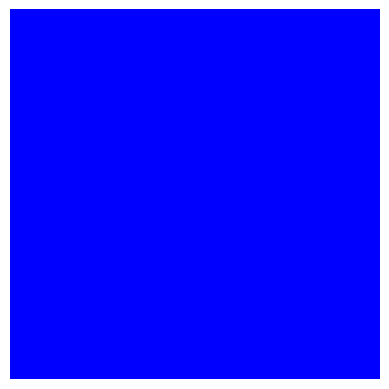

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create a 256x256 image with blue background (RGB: 0, 0, 255)
image_size = 256
image = np.full((image_size, image_size, 3), [0, 0, 255], dtype=np.uint8)

# Save the image as a PNG file
image_pil = Image.fromarray(image)
image_pil.save('blue_background.png')

# Display the image
plt.imshow(image)
plt.axis('off') # Hide axes
plt.show()

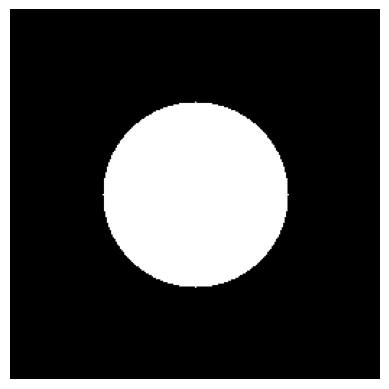

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create a 256x256 binary mask image (initialized to black, 0)
image_size = 256
mask_image = np.zeros((image_size, image_size), dtype=np.uint8)

# Draw a white circle in the middle (value 255)
center_x, center_y = image_size // 2, image_size // 2
radius = image_size // 4

y, x = np.ogrid[:image_size, :image_size]
dist_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)
mask_image[dist_from_center <= radius] = 255

# Save the mask image as a PNG file (no 'mode' arg needed for 2D uint8 → 'L')
mask_pil = Image.fromarray(mask_image)
mask_pil.save('circle_mask.png')

# Display the mask image
plt.imshow(mask_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


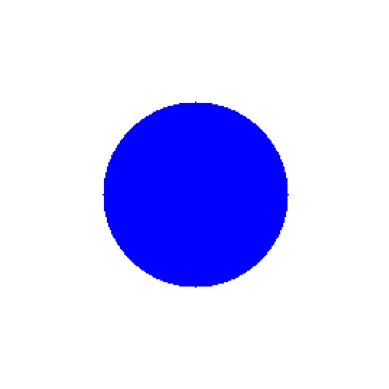

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

blue = Image.open('blue_background.png').convert('RGB')
mask = Image.open('circle_mask.png').convert('L')  # 0..255 where 255 = keep blue
white = Image.new('RGB', blue.size, (255, 255, 255))

result_img = Image.composite(blue, white, mask)   # mask is alpha for blue
result_img.save('blue_circle_on_white.png')

plt.imshow(result_img)
plt.axis('off'); plt.show()


please generate a product requirement document for a simple program that will detect edges in an image and return it as binary edge image


## Product Requirements Document: Edge Detection Program

**Version:** 1.0

**Date:** September 19, 2025

**Author:** [Your Name/Team Name]

**Status:** Draft

---

### 1. Introduction

This document outlines the product requirements for a simple yet powerful command-line program that detects edges in a digital image and outputs the result as a binary edge image. The primary goal of this program is to provide a fundamental computer vision capability that can be utilized by developers, researchers, and students in various applications, such as image analysis, object recognition, and feature extraction.

---

### 2. Problem Statement

Identifying the boundaries of objects within an image is a crucial first step in many computer vision and image processing workflows. Manually tracing edges is a tedious and time-consuming process. An automated tool that can quickly and accurately detect these edges and present them in a simple, machine-readable format is essential for streamlining these workflows.

---

### 3. User Personas

*   **Software Developer:** Needs a reliable and easy-to-integrate edge detection tool for their applications. They require clear input and output specifications and predictable performance.
*   **Computer Science Student:** Is learning about image processing and computer vision concepts. They need a straightforward tool to experiment with edge detection algorithms and understand their impact on different images.
*   **Researcher:** Requires a baseline edge detection tool for their experiments in areas like object recognition, image segmentation, and feature extraction. They value accuracy and the ability to process a variety of image formats.

---

### 4. Functional Requirements

#### 4.1. Core Functionality

*   **Image Input:** The program MUST accept a single image file as input from the command line.
    *   The program MUST support the following image formats: JPEG, PNG, and BMP.
*   **Edge Detection Algorithm:** The program MUST utilize an edge detection algorithm to identify edges within the input image.
    *   The default and primary algorithm to be implemented is the **Canny edge detector**, known for its effectiveness in detecting a wide range of edges while minimizing noise.
*   **Output:** The program MUST generate a binary image representing the detected edges.
    *   In the output image, edge pixels MUST be represented by a value of 255 (white), and non-edge pixels MUST be represented by a value of 0 (black).
    *   The output image MUST be saved in the same format as the input image.
    *   The output filename MUST be derived from the input filename with a "_edges" suffix (e.g., "input.jpg" becomes "input_edges.jpg").

#### 4.2. Command-Line Interface (CLI)

*   The program MUST be executable from the command line.
*   The user MUST be able to specify the input image file path as a command-line argument.
*   The program MUST provide a help flag (`-h` or `--help`) that displays a brief description of the program and its usage.

---

### 5. Non-Functional Requirements

*   **Performance:** The program should process a 1920x1080 pixel image in under 5 seconds on a standard modern computer.
*   **Usability:** The command-line interface should be simple and intuitive for users with basic command-line knowledge.
*   **Portability:** The program should be executable on Windows, macOS, and Linux operating systems.
*   **Reliability:** The program should handle common errors gracefully, such as invalid file paths or unsupported image formats, by providing informative error messages to the user.

---

### 6. Success Metrics

*   The program correctly identifies and outlines the major edges in a variety of test images (e.g., images with clear objects, textured surfaces, and varying lighting conditions).
*   The program successfully processes images of the supported formats without errors.
*   Positive feedback from target users (developers, students, and researchers) regarding the program's ease of use and accuracy.

---

### 7. Future Enhancements (Out of Scope for Version 1.0)

*   Support for additional input and output image formats (e.g., TIFF, GIF).
*   Ability to specify the output file path and format.
*   Allowing users to choose from different edge detection algorithms (e.g., Sobel, Prewitt).
*   Providing options to adjust the parameters of the edge detection algorithm (e.g., threshold values for the Canny detector).
*   A graphical user interface (GUI) for users who are not comfortable with the command line.
*   Batch processing of multiple images in a single command.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_edges(image_path, thresholds=(100, 200), sigma=None, save=True, display=True, output_suffix="_canny_edges"):
    """
    Detect edges in an image using the Canny algorithm.

    Args:
        image_path (str): Path to the input image file.
        thresholds (tuple): (low, high) thresholds for Canny when sigma is None.
        sigma (float|None): If provided (e.g., 0.33), compute thresholds from median intensity.
        save (bool): If True, write the edge image to disk next to the input.
        display (bool): If True, display the edge image inline (matplotlib).
        output_suffix (str): Suffix appended to the base filename for the saved edge image.

    Returns:
        edges (np.ndarray|None): Binary edge image (uint8) or None on error.
        output_path (str|None): Path to the saved edge image if saved, else None.
    """
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' was not found.")
        return None, None

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: '{image_path}' is not a valid or supported image.")
        return None, None

    if sigma is not None:
        med = float(np.median(image))
        lower = int(max(0, (1.0 - sigma) * med))
        upper = int(min(255, (1.0 + sigma) * med))
    else:
        lower, upper = thresholds

    edges = cv2.Canny(image, lower, upper)

    output_path = None
    if save:
        base, ext = os.path.splitext(image_path)
        output_path = f"{base}{output_suffix}{ext}"
        cv2.imwrite(output_path, edges)
        print(f"Edge detection successful. Output saved to '{output_path}'")

    if display:
        plt.figure(figsize=(5, 5))
        plt.imshow(edges, cmap='gray')
        plt.axis('off')
        plt.title('Canny edges')
        plt.show()

    return edges, output_path


Edge detection successful. Output saved to 'circle_mask_canny_edges.png'


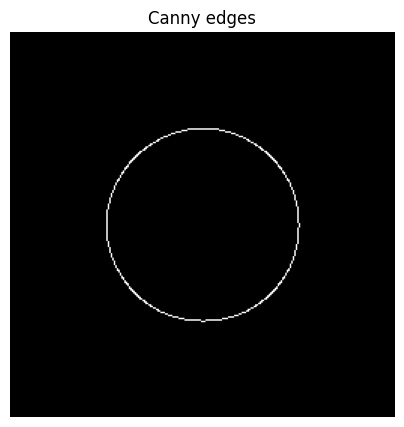

In [ ]:
# Auto thresholds based on image median (recommended):
edges, out_path = detect_edges('circle_mask.png', sigma=0.33)

# Or fixed thresholds:
#edges, out_path = detect_edges('circle_mask.png', thresholds=(100, 200))


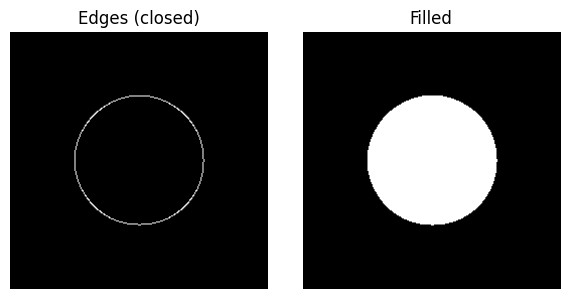

In [2]:
import cv2, numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('circle_mask_canny_edges.png', cv2.IMREAD_GRAYSCALE)
_, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # edges=255

# Close tiny gaps so the boundary is fully closed
bw = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8), iterations=1)

# Flood-fill the background from top-left
ff = bw.copy()
h, w = ff.shape
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(ff, mask, (0, 0), 255)

# Invert flood-filled background to get interior, then OR with edge to keep outline
filled = cv2.bitwise_not(ff) | bw

# Save (optional)
cv2.imwrite('circle_filled.png', filled)

# --- Display in notebook ---
plt.figure(figsize=(6,3))
plt.subplot(1,2,1); plt.imshow(bw, cmap='gray'); plt.title('Edges (closed)'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(filled, cmap='gray', vmin=0, vmax=255); plt.title('Filled'); plt.axis('off')
plt.tight_layout()
plt.show()


Found 1 region(s): [(64, 64, 129, 129)]


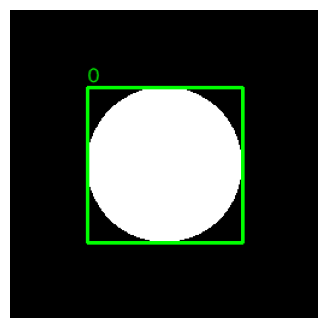

In [3]:
import cv2, numpy as np
import matplotlib.pyplot as plt

# Load the filled binary image (white object on black background)
filled = cv2.imread('circle_filled.png', cv2.IMREAD_GRAYSCALE)

# Ensure binary 0/255
_, bw = cv2.threshold(filled, 127, 255, cv2.THRESH_BINARY)

# Find outer contours (each white region)
contours, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles on a color copy for visualization
vis = cv2.cvtColor(bw, cv2.COLOR_GRAY2BGR)

bboxes = []
min_area = 25  # ignore tiny specks if any
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    if area < min_area:
        continue
    x, y, w, h = cv2.boundingRect(c)
    bboxes.append((x, y, w, h))
    cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2)  # green
    cv2.putText(vis, f"{i}", (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

print(f"Found {len(bboxes)} region(s): {bboxes}")

plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off'); plt.show()


penguins and pandas

In [ ]:
import pandas as pd
import seaborn as sns

# Load the penguins dataset from seaborn
penguins_df = sns.load_dataset("penguins")

# Display the first few rows and information about the dataframe
display(penguins_df.head())
penguins_df.info()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


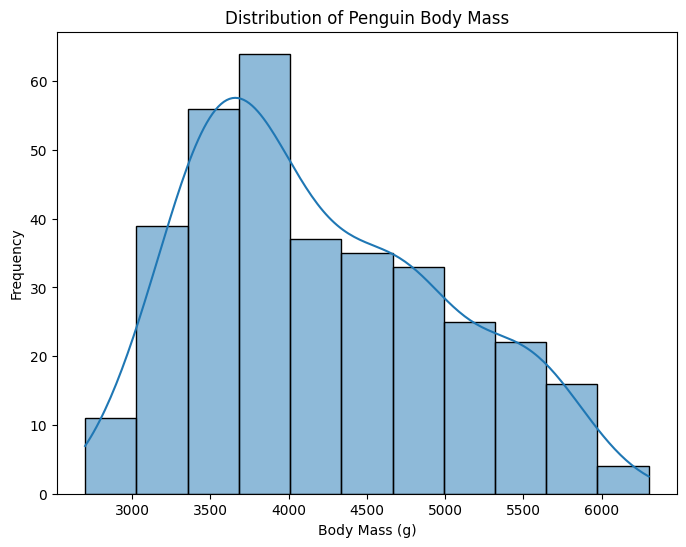

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a histogram of penguin body mass
plt.figure(figsize=(8, 6))
sns.histplot(data=penguins_df, x="body_mass_g", kde=True)
plt.title("Distribution of Penguin Body Mass")
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.show()

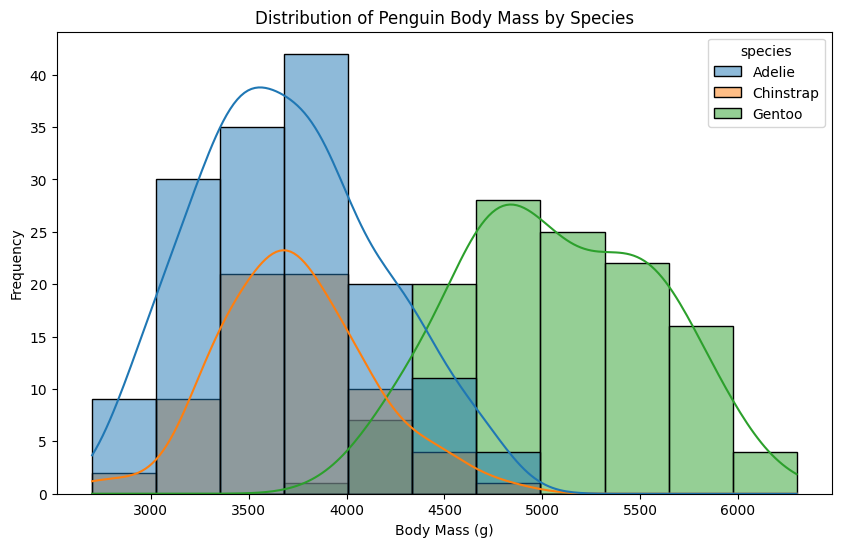

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a histogram of penguin body mass separated by species
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins_df, x="body_mass_g", hue="species", kde=True)
plt.title("Distribution of Penguin Body Mass by Species")
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.show()

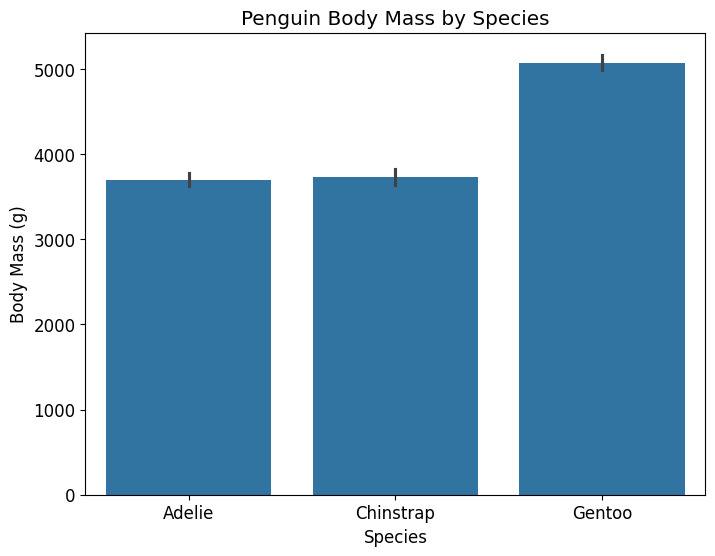

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger font size for all text elements
plt.rcParams.update({'font.size': 12}) # You can adjust the size as needed

# Generate a bar plot of body mass as a function of species
plt.figure(figsize=(8, 6))
sns.barplot(data=penguins_df, x="species", y="body_mass_g")
plt.title("Penguin Body Mass by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

# Reset font size to default if needed for subsequent plots
plt.rcParams.update({'font.size': plt.rcParamsDefault['font.size']})

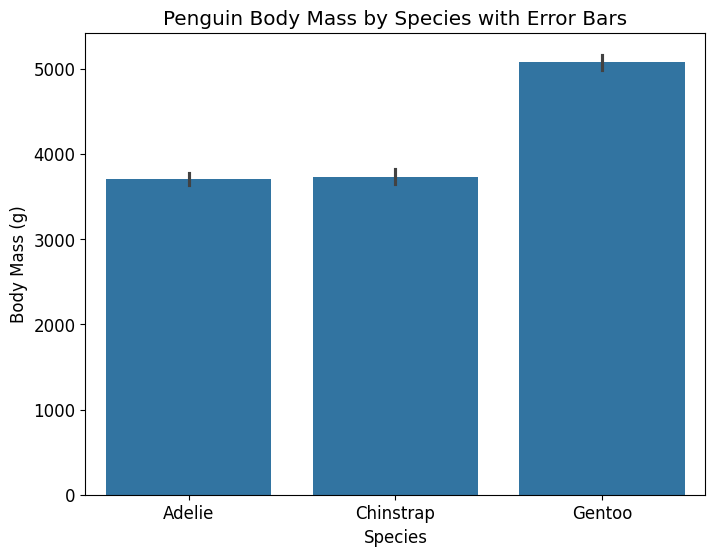

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger font size for all text elements (optional, but good for figures)
plt.rcParams.update({'font.size': 12})

# Generate a bar plot of body mass as a function of species with error bars
plt.figure(figsize=(8, 6))
sns.barplot(data=penguins_df, x="species", y="body_mass_g") # seaborn barplot includes error bars by default
plt.title("Penguin Body Mass by Species with Error Bars")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")

# Save the figure as a high-quality PNG
plt.savefig('penguin_body_mass_barplot.png', dpi=300, bbox_inches='tight')

# Save the figure as a vector graphic (SVG)
plt.savefig('penguin_body_mass_barplot.svg', bbox_inches='tight')

plt.show()

# Reset font size to default if needed for subsequent plots
plt.rcParams.update({'font.size': plt.rcParamsDefault['font.size']})

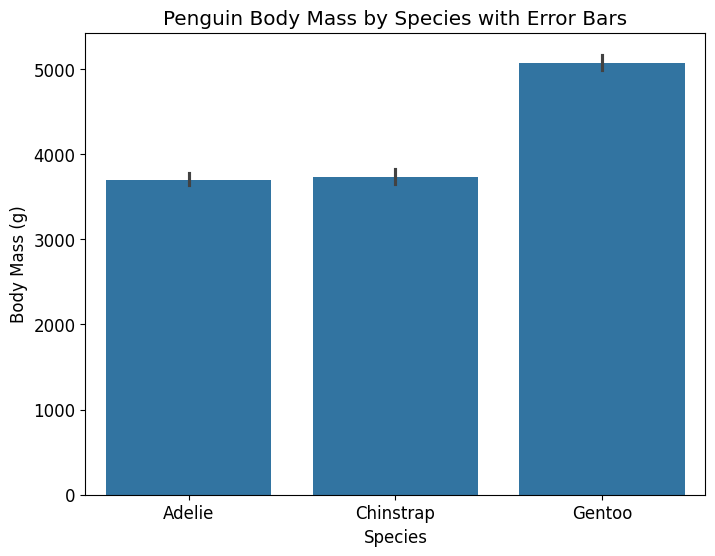

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger font size for all text elements (optional, but good for figures)
plt.rcParams.update({'font.size': 12})

# Generate a bar plot of body mass as a function of species with error bars
plt.figure(figsize=(8, 6))
sns.barplot(data=penguins_df, x="species", y="body_mass_g") # seaborn barplot includes error bars by default
plt.title("Penguin Body Mass by Species with Error Bars")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")

# Save the figure as a high-quality PDF
plt.savefig('penguin_body_mass_barplot.pdf', bbox_inches='tight')

plt.show()

# Reset font size to default if needed for subsequent plots
plt.rcParams.update({'font.size': plt.rcParamsDefault['font.size']})

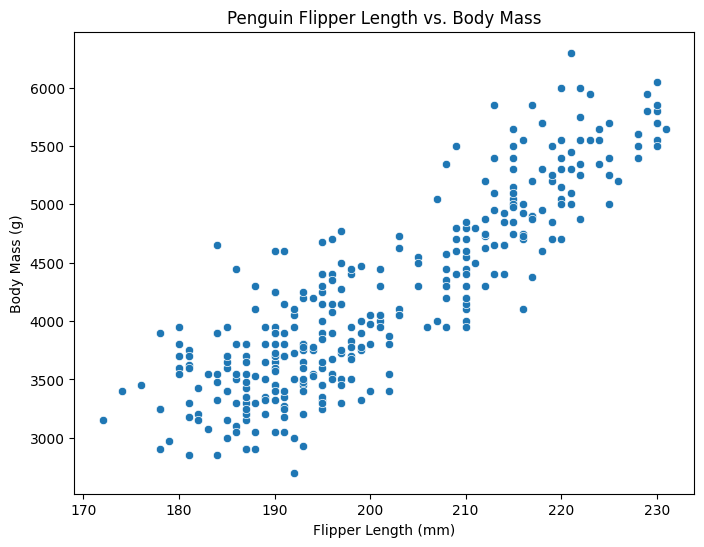

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a scatterplot of flipper length vs. body mass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins_df, x="flipper_length_mm", y="body_mass_g")
plt.title("Penguin Flipper Length vs. Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

<Figure size 1000x600 with 0 Axes>

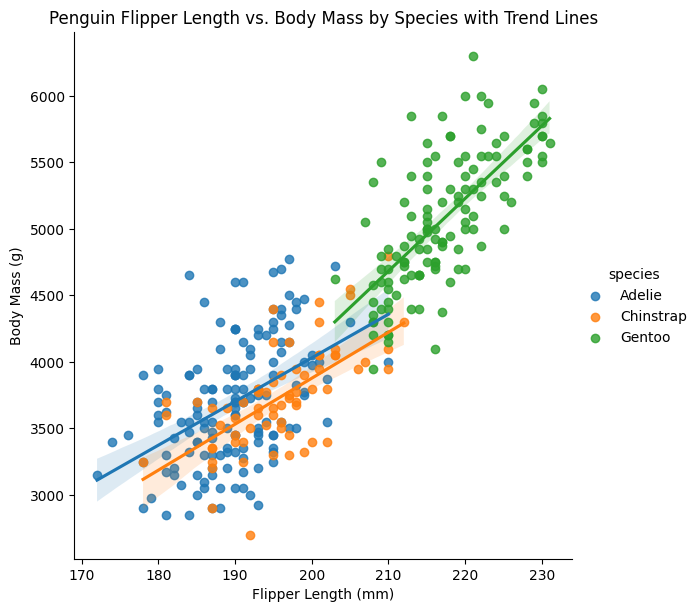

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a scatterplot of flipper length vs. body mass, separated by species with trend lines
plt.figure(figsize=(10, 6))
sns.lmplot(data=penguins_df, x="flipper_length_mm", y="body_mass_g", hue="species", height=6)
plt.title("Penguin Flipper Length vs. Body Mass by Species with Trend Lines")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

### Generate a simple Python program

**Planned focus:** Draw a circle with NumPy and save PNG

- **Key topics / activities:** NumPy arrays as images, basic image I/O
- **Example / mini-project:** Create 100×100 image: green background with white circle; save as PNG

In [ ]:
# TODO: Implement: Generate a simple Python program for Day 5
# Suggested starting hints from schedule:
# Title: Draw a circle with NumPy and save PNG
# Key topics / activities: NumPy arrays as images, basic image I/O
# Example / Mini-project: Create 100×100 image: green background with white circle; save as PNG

# Write your code here...

### Solve problem in your own work

**Planned focus:** Simulate an interaction & visualize

- **Key topics / activities:** Bivariate median splits, data simulation, error bars
- **Example / mini-project:** Generate data showing A×B interaction and plot grouped bars with error bars

In [ ]:
# TODO: Implement: Solve problem in your own work for Day 5
# Suggested starting hints from schedule:
# Title: Simulate an interaction & visualize
# Key topics / activities: Bivariate median splits, data simulation, error bars
# Example / Mini-project: Generate data showing A×B interaction and plot grouped bars with error bars

# Write your code here...

### Perform data science using GenAI

**Planned focus:** Median split & cleanup on penguins (viz-ready)

- **Key topics / activities:** Recode by median, drop NAs, prep for plotting
- **Example / mini-project:** Recreate median-split categorical variable and export a clean, plot-ready table

In [ ]:
# TODO: Implement: Perform data science using GenAI for Day 5
# Suggested starting hints from schedule:
# Title: Median split & cleanup on penguins (viz-ready)
# Key topics / activities: Recode by median, drop NAs, prep for plotting
# Example / Mini-project: Recreate median-split categorical variable and export a clean, plot-ready table

# Write your code here...